<a href="https://colab.research.google.com/github/yutianma1802/master-thesis/blob/main/hPNMT_assay_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided enzyme kinetics data to determine the Michaelis-Menten parameters (Km and Vmax). This involves calculating product formation and substrate remaining over time, determining initial velocities from the substrate remaining data, and fitting these initial velocities to the Michaelis-Menten model. The analysis should include visualizations of the data at various stages, including absorbance over time, absorbance difference, product formation, substrate remaining, and the Michaelis-Menten plot with the fitted curve. The final output should be the calculated Km and Vmax values. Use the data from the file "data.xlsx".

## Load and preprocess data

### Subtask:
Load the data from the Excel file, rename columns, and create a processed DataFrame with 'Time [s]', 'Absorbance', 'Concentration', and 'Enzyme' columns.

**Reasoning**:
Load the data from the Excel file, rename columns, define well assignments, and process the data to create a single DataFrame with 'Time [s]', 'Absorbance', 'Concentration', and 'Enzyme' columns.

In [1]:
import pandas as pd

file_path = '/content/hPNMT raw data.xlsx'
try:
  # Read the Excel file, skipping the first row and using the second row as headers
  df = pd.read_excel(file_path, skiprows=1, header=0)

  # Rename the column with time data from 'Unnamed: 1' to 'Time [s]'
  df.rename(columns={'Unnamed: 1': 'Time [s]'}, inplace=True)

  display(df.head())
except FileNotFoundError:
  print(f"Error: The file was not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


# Define the wells for each concentration and enzyme condition
# Updated well assignments based on user's input.
well_assignments = {
    20: {'present': ['A1', 'A2', 'A3'], 'absent': ['C1', 'C2', 'C3']},
    50: {'present': ['A4', 'A5', 'A6'], 'absent': ['C4', 'C5', 'C6']},
    100: {'present': ['A7', 'A8', 'A9'], 'absent': ['C7', 'C8', 'C9']},
    300: {'present': ['A10', 'A11', 'A12'], 'absent': ['C10', 'C11', 'C12']},
    600: {'present': ['B1', 'B2', 'B3'], 'absent': ['D1', 'D2', 'D4']}
}


# Create an empty list to store the processed data
processed_data = []

# Iterate through each concentration, enzyme condition, and well
for concentration, conditions in well_assignments.items():
    for enzyme_status, wells in conditions.items():
        for well in wells:
            # Select the relevant columns (Time [s] and the well absorbance data)
            # Ensure the column name from the Excel file matches exactly
            well_data = df[['Time [s]', well]].copy()

            # Rename the absorbance column to 'Absorbance'
            well_data.rename(columns={well: 'Absorbance'}, inplace=True)

            # Add columns for Concentration and Enzyme status
            well_data['Concentration'] = concentration
            well_data['Enzyme'] = (enzyme_status == 'present') # True if enzyme is present, False otherwise

            # Append the processed data for this well to the list
            processed_data.append(well_data)

# Concatenate all the processed dataframes into a single dataframe
processed_df = pd.concat(processed_data, ignore_index=True)

# Display the first few rows of the processed dataframe
display(processed_df.head())

# Display information about the processed dataframe
display(processed_df.info())

,Cycle Nr.,Time [s],Temp. [°C],A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,1,0.000,24.6,0.7075,0.7318,0.7293,0.7517,0.7177,0.7429,0.7545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,60.013,24.5,0.7064,0.7270,0.7256,0.7456,0.7124,0.7351,0.7459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,120.035,24.6,0.7020,0.7222,0.7210,0.7395,0.7066,0.7306,0.7409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,180.045,24.5,0.6993,0.7195,0.7195,0.7362,0.7030,0.7268,0.7371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,240.057,24.5,0.6961,0.7171,0.7159,0.7322,0.6980,0.7254,0.7322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Time [s],Absorbance,Concentration,Enzyme
0,0.000,0.7075,20,True
1,60.013,0.7064,20,True
2,120.035,0.7020,20,True
3,180.045,0.6993,20,True
4,240.057,0.6961,20,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time [s]       1800 non-null   float64
 1   Absorbance     1800 non-null   float64
 2   Concentration  1800 non-null   int64  
 3   Enzyme         1800 non-null   bool   
dtypes: bool(1), float64(2), int64(1)
memory usage: 44.1 KB


None

## Calculate time in minutes

### Subtask:
Add a new column 'Time [min]' to the processed DataFrame by converting 'Time [s]' to minutes.

**Reasoning**:
Divide the 'Time [s]' column by 60 to convert seconds to minutes and store the result in a new column 'Time [min]', then display the first few rows.

In [2]:
processed_df['Time [min]'] = processed_df['Time [s]'] / 60
display(processed_df.head())

,Time [s],Absorbance,Concentration,Enzyme,Time [min]
0,0.000,0.7075,20,True,0.000000
1,60.013,0.7064,20,True,1.000217
2,120.035,0.7020,20,True,2.000583
3,180.045,0.6993,20,True,3.000750
4,240.057,0.6961,20,True,4.000950


## Filter enzyme absent data

### Subtask:
Filter the processed DataFrame to include only the rows where the enzyme is absent.

**Reasoning**:
Filter the processed DataFrame to include only the rows where the enzyme is absent and display the head and info.

In [3]:
# Filter the data to include only the rows where enzyme is absent
enzyme_absent_df = processed_df[processed_df['Enzyme'] == False].copy()

# Display the first few rows of the new dataframe
display(enzyme_absent_df.head())

# Display information about the new dataframe
display(enzyme_absent_df.info())

,Time [s],Absorbance,Concentration,Enzyme,Time [min]
180,0.000,0.8094,20,False,0.000000
181,60.013,0.8066,20,False,1.000217
182,120.035,0.8034,20,False,2.000583
183,180.045,0.7990,20,False,3.000750
184,240.057,0.7965,20,False,4.000950


<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 180 to 1799
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time [s]       900 non-null    float64
 1   Absorbance     900 non-null    float64
 2   Concentration  900 non-null    int64  
 3   Enzyme         900 non-null    bool   
 4   Time [min]     900 non-null    float64
dtypes: bool(1), float64(3), int64(1)
memory usage: 36.0 KB


None

**Reasoning**:
Group the enzyme-absent data by 'Time [min]' and 'Concentration' and calculate the mean absorbance for the triplicates.

In [4]:
# Group by 'Time [min]' and 'Concentration' and calculate the mean absorbance
averaged_enzyme_absent_data = enzyme_absent_df.groupby(['Time [min]', 'Concentration'])['Absorbance'].mean().reset_index()

# Display the first few rows of the new dataframe
display(averaged_enzyme_absent_data.head())

# Display information about the new dataframe
display(averaged_enzyme_absent_data.info())

,Time [min],Concentration,Absorbance
0,0.0,20,0.797200
1,0.0,50,0.739533
2,0.0,100,0.744867
3,0.0,300,0.793100
4,0.0,600,0.771167


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time [min]     300 non-null    float64
 1   Concentration  300 non-null    int64  
 2   Absorbance     300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


None

**Reasoning**:
Calculate the standard deviation for each timepoint and concentration in the enzyme-absent data and merge it with the averaged data.

In [5]:
# Calculate the standard deviation for each timepoint and concentration in the enzyme-absent data
std_enzyme_absent_data = enzyme_absent_df.groupby(['Time [min]', 'Concentration'])['Absorbance'].std().reset_index()

# Rename the standard deviation column for clarity
std_enzyme_absent_data.rename(columns={'Absorbance': 'Absorbance_std'}, inplace=True)

# Merge the averaged data with the standard deviation data
averaged_enzyme_absent_data_with_std = pd.merge(averaged_enzyme_absent_data, std_enzyme_absent_data, on=['Time [min]', 'Concentration'])

# Display the first few rows of the new dataframe
display(averaged_enzyme_absent_data_with_std.head())

# Display information about the new dataframe
display(averaged_enzyme_absent_data_with_std.info())

,Time [min],Concentration,Absorbance,Absorbance_std
0,0.0,20,0.797200,0.015470
1,0.0,50,0.739533,0.015859
2,0.0,100,0.744867,0.054515
3,0.0,300,0.793100,0.016086
4,0.0,600,0.771167,0.003213


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time [min]      300 non-null    float64
 1   Concentration   300 non-null    int64  
 2   Absorbance      300 non-null    float64
 3   Absorbance_std  300 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


None

## Filter enzyme present data

### Subtask:
Filter the processed DataFrame to include only the rows where the enzyme is present.

**Reasoning**:
Filter the processed_df DataFrame to include only the rows where the 'Enzyme' column is True and display the head and info of the new dataframe.

In [6]:
# Filter the data to include only the rows where enzyme is present
enzyme_present_df = processed_df[processed_df['Enzyme'] == True].copy()

# Display the first few rows of the new dataframe
display(enzyme_present_df.head())

# Display information about the new dataframe
display(enzyme_present_df.info())

,Time [s],Absorbance,Concentration,Enzyme,Time [min]
0,0.000,0.7075,20,True,0.000000
1,60.013,0.7064,20,True,1.000217
2,120.035,0.7020,20,True,2.000583
3,180.045,0.6993,20,True,3.000750
4,240.057,0.6961,20,True,4.000950


<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 1619
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time [s]       900 non-null    float64
 1   Absorbance     900 non-null    float64
 2   Concentration  900 non-null    int64  
 3   Enzyme         900 non-null    bool   
 4   Time [min]     900 non-null    float64
dtypes: bool(1), float64(3), int64(1)
memory usage: 36.0 KB


None

## Group and average enzyme present data

### Subtask:
Group the enzyme-present data by 'Time [min]' and 'Concentration' and calculate the mean absorbance.

**Reasoning**:
Group the enzyme-present data by 'Time [min]' and 'Concentration' and calculate the mean absorbance.

In [7]:
# Group by 'Time [min]' and 'Concentration' and calculate the mean absorbance
averaged_enzyme_data = enzyme_present_df.groupby(['Time [min]', 'Concentration'])['Absorbance'].mean().reset_index()

# Display the first few rows of the new dataframe
display(averaged_enzyme_data.head())

# Display information about the new dataframe
display(averaged_enzyme_data.info())

,Time [min],Concentration,Absorbance
0,0.0,20,0.722867
1,0.0,50,0.737433
2,0.0,100,0.745633
3,0.0,300,0.758000
4,0.0,600,0.757367


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time [min]     300 non-null    float64
 1   Concentration  300 non-null    int64  
 2   Absorbance     300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


None

**Reasoning**:
Calculate the standard deviation for each timepoint and concentration in the enzyme-present data and merge it with the averaged data.

In [8]:
# Calculate the standard deviation for each timepoint and concentration in the enzyme-present data
std_enzyme_data = enzyme_present_df.groupby(['Time [min]', 'Concentration'])['Absorbance'].std().reset_index()

# Rename the standard deviation column for clarity
std_enzyme_data.rename(columns={'Absorbance': 'Absorbance_std'}, inplace=True)

# Merge the averaged data with the standard deviation data
averaged_enzyme_data_with_std = pd.merge(averaged_enzyme_data, std_enzyme_data, on=['Time [min]', 'Concentration'])

# Display the first few rows of the new dataframe
display(averaged_enzyme_data_with_std.head())

# Display information about the new dataframe
display(averaged_enzyme_data_with_std.info())

,Time [min],Concentration,Absorbance,Absorbance_std
0,0.0,20,0.722867,0.013367
1,0.0,50,0.737433,0.017647
2,0.0,100,0.745633,0.014585
3,0.0,300,0.758000,0.004943
4,0.0,600,0.757367,0.005169


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time [min]      300 non-null    float64
 1   Concentration   300 non-null    int64  
 2   Absorbance      300 non-null    float64
 3   Absorbance_std  300 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


None

## Combine averaged data

### Subtask:
Combine the averaged enzyme-present and enzyme-absent data for visualization.

**Reasoning**:
Concatenate the averaged enzyme-present and enzyme-absent dataframes and add an 'Enzyme' column to distinguish them. Display the head of the combined dataframe to verify the result.

In [9]:
# Combine the averaged enzyme-present and enzyme-absent data
combined_averaged_data = pd.concat([averaged_enzyme_data_with_std.assign(Enzyme='Present'),
                                    averaged_enzyme_absent_data_with_std.assign(Enzyme='Absent')])

# Display the first few rows of the combined dataframe
display(combined_averaged_data.head())

,Time [min],Concentration,Absorbance,Absorbance_std,Enzyme
0,0.0,20,0.722867,0.013367,Present
1,0.0,50,0.737433,0.017647,Present
2,0.0,100,0.745633,0.014585,Present
3,0.0,300,0.758000,0.004943,Present
4,0.0,600,0.757367,0.005169,Present


## Plot averaged absorbance with std

### Subtask:
Plot the averaged absorbance over time for each concentration, separated by enzyme condition, including standard deviation as error bars.

**Reasoning**:
Plot the averaged absorbance over time for each concentration, separated by enzyme condition, including standard deviation as error bars.

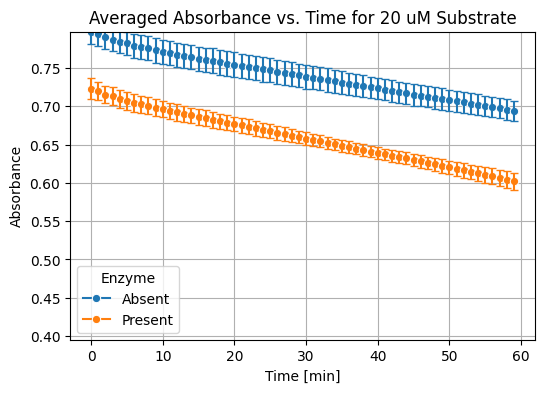

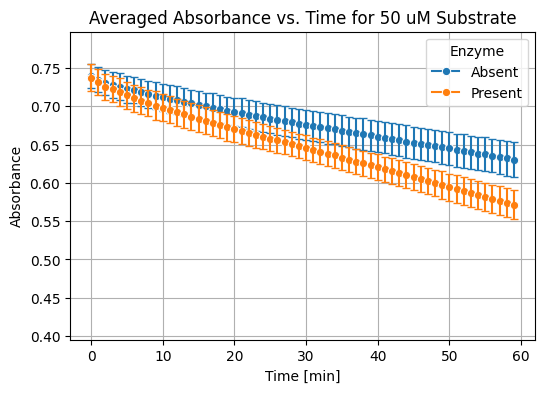

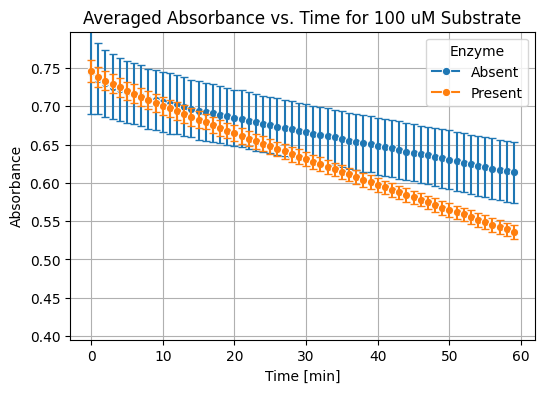

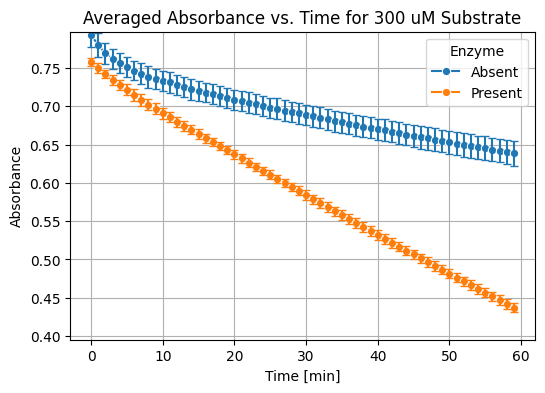

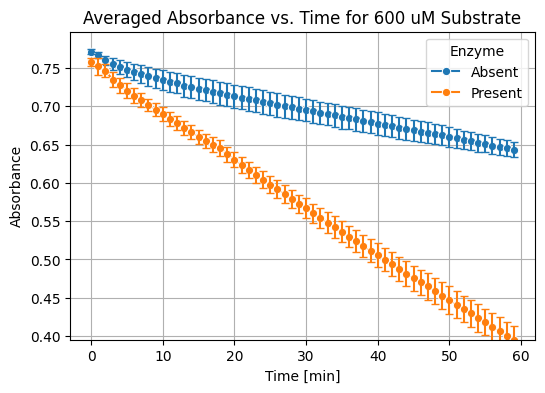

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique concentrations
concentrations = combined_averaged_data['Concentration'].unique()

# Sort concentrations for ordered plotting
concentrations.sort()

# Determine the overall minimum and maximum absorbance for setting a consistent y-axis scale
global_min_abs = combined_averaged_data['Absorbance'].min()
global_max_abs = combined_averaged_data['Absorbance'].max()


# Iterate through each concentration and create a separate plot
for concentration in concentrations:
    # Filter data for the current concentration
    subset_data = combined_averaged_data[combined_averaged_data['Concentration'] == concentration]

    # Create a new figure for each plot
    plt.figure(figsize=(6, 4)) # Adjusted figure size for smaller graphs

    # Get the unique enzyme statuses for consistent coloring
    enzyme_statuses = sorted(subset_data['Enzyme'].unique())
    palette = sns.color_palette(None, n_colors=len(enzyme_statuses))
    color_map = {status: palette[i] for i, status in enumerate(enzyme_statuses)}

    # Iterate through each enzyme status to plot lines and error bars with consistent colors
    for enzyme_status in enzyme_statuses: # Corrected loop to iterate through all enzyme statuses
        enzyme_subset = subset_data[subset_data['Enzyme'] == enzyme_status]
        color = color_map[enzyme_status]

        # Plot the line for the current enzyme status
        sns.lineplot(data=enzyme_subset, x='Time [min]', y='Absorbance', marker='o', color=color, label=str(enzyme_status))

        # Add error bars for the current enzyme status
        plt.errorbar(x=enzyme_subset['Time [min]'], y=enzyme_subset['Absorbance'], yerr=enzyme_subset['Absorbance_std'], fmt='none', capsize=3, color=color)


    plt.title(f'Averaged Absorbance vs. Time for {concentration} uM Substrate') # Simplified title
    plt.xlabel('Time [min]')
    plt.ylabel('Absorbance')

    # Set the y-axis limits to the global minimum and maximum absorbance
    plt.ylim(global_min_abs, global_max_abs)

    plt.grid(True)
    plt.legend(title='Enzyme')
    plt.show()

## Calculate absorbance difference

### Subtask:
Calculate the difference in absorbance between the enzyme-present and enzyme-absent conditions and its standard deviation.

**Reasoning**:
Merge the averaged enzyme-present and enzyme-absent data, calculate the absorbance difference and its standard deviation, and display the head and info of the resulting DataFrame.

In [11]:
# Merge the averaged enzyme-present and enzyme-absent data on Time [min] and Concentration
# Use suffixes to distinguish the absorbance and std columns from the two conditions
merged_diff_data = pd.merge(averaged_enzyme_data_with_std, averaged_enzyme_absent_data_with_std,
                            on=['Time [min]', 'Concentration'],
                            suffixes=('_present', '_absent'))

# Calculate the difference in absorbance (Enzyme Present - Enzyme Absent)
merged_diff_data['Absorbance_Difference'] = merged_diff_data['Absorbance_present'] - merged_diff_data['Absorbance_absent']

# To calculate the standard deviation of the difference, we assume the measurements are independent.
# The variance of the difference of two independent variables is the sum of their variances.
# Standard deviation is the square root of the variance.
merged_diff_data['Absorbance_Difference_std'] = (merged_diff_data['Absorbance_std_present']**2 + merged_diff_data['Absorbance_std_absent']**2)**0.5

# Display the first few rows of the dataframe with the difference and its standard deviation
display(merged_diff_data.head())

# Display information about the new dataframe
display(merged_diff_data.info())

,Time [min],Concentration,Absorbance_present,Absorbance_std_present,Absorbance_absent,Absorbance_std_absent,Absorbance_Difference,Absorbance_Difference_std
0,0.0,20,0.722867,0.013367,0.797200,0.015470,-0.074333,0.020445
1,0.0,50,0.737433,0.017647,0.739533,0.015859,-0.002100,0.023726
2,0.0,100,0.745633,0.014585,0.744867,0.054515,0.000767,0.056433
3,0.0,300,0.758000,0.004943,0.793100,0.016086,-0.035100,0.016828
4,0.0,600,0.757367,0.005169,0.771167,0.003213,-0.013800,0.006087


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time [min]                 300 non-null    float64
 1   Concentration              300 non-null    int64  
 2   Absorbance_present         300 non-null    float64
 3   Absorbance_std_present     300 non-null    float64
 4   Absorbance_absent          300 non-null    float64
 5   Absorbance_std_absent      300 non-null    float64
 6   Absorbance_Difference      300 non-null    float64
 7   Absorbance_Difference_std  300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


None

## Plot absorbance difference

### Subtask:
Plot the absorbance difference over time for each concentration, including standard deviation as error bars.

**Reasoning**:
Get the unique concentrations, sort them, iterate through each concentration to filter the data, create a figure, plot the absorbance difference with error bars, set title and labels, add grid and legend, and display the plot.

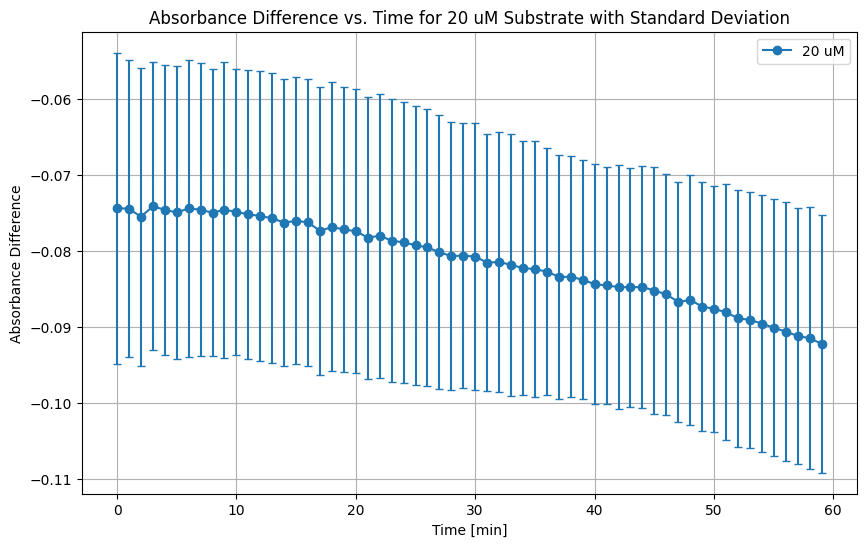

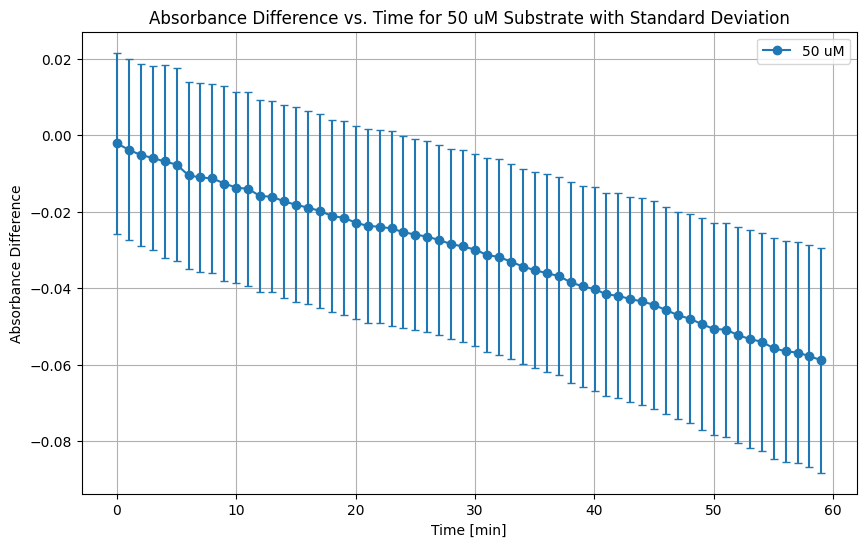

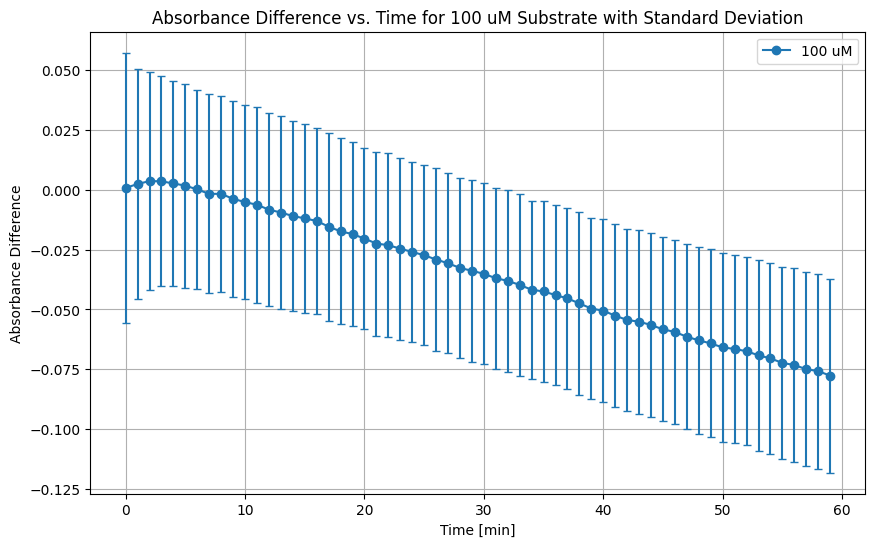

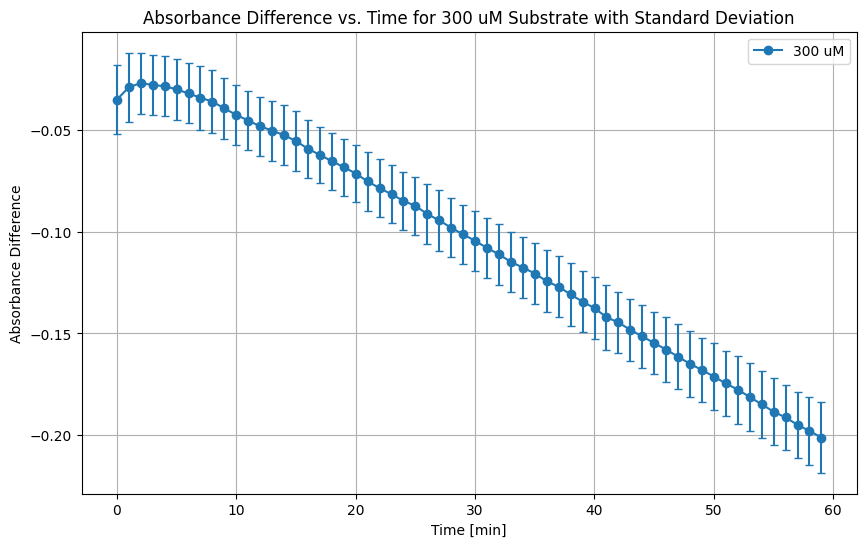

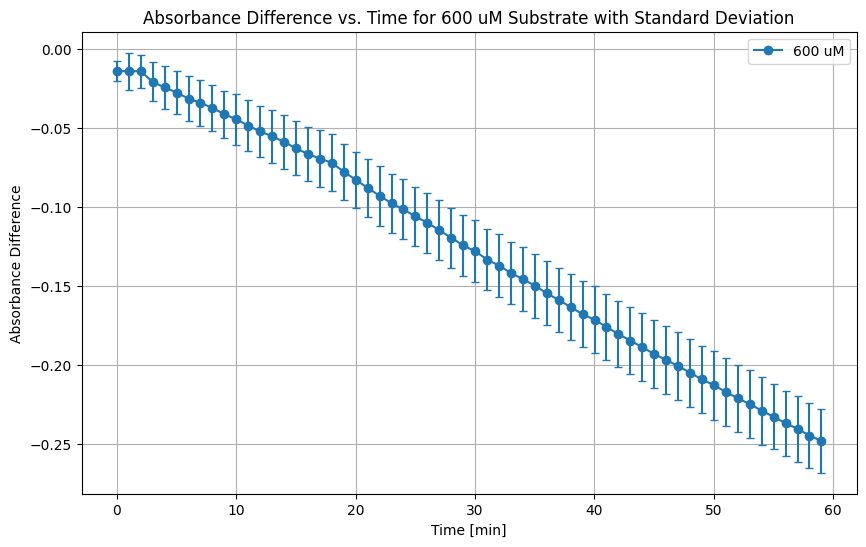

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique concentrations
concentrations = merged_diff_data['Concentration'].unique()

# Sort concentrations for ordered plotting
concentrations.sort()

# Iterate through each concentration to create a separate plot for absorbance difference
for concentration in concentrations:
    # Filter data for the current concentration
    subset = merged_diff_data[merged_diff_data['Concentration'] == concentration]

    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))

    # Plot the absorbance difference over time for the current concentration
    plt.plot(subset['Time [min]'], subset['Absorbance_Difference'], marker='o', label=f'{concentration} uM')

    # Add error bars for the current concentration
    plt.errorbar(x=subset['Time [min]'], y=subset['Absorbance_Difference'], yerr=subset['Absorbance_Difference_std'], fmt='none', capsize=3)


    plt.title(f'Absorbance Difference vs. Time for {concentration} uM Substrate with Standard Deviation')
    plt.xlabel('Time [min]')
    plt.ylabel('Absorbance Difference')
    plt.grid(True)
    plt.legend() # Add a legend for the current concentration
    plt.show()

**Reasoning**:
Rename the 'Absorbance_Difference' column to 'Sample_Blank' to reflect the terminology of subtracting the blank (enzyme-absent) from the sample (enzyme-present) and display the head and info of the updated dataframe.

In [13]:
# Rename the 'Absorbance_Difference' column to 'Sample_Blank'
merged_diff_data.rename(columns={'Absorbance_Difference': 'Sample_Blank'}, inplace=True)

# Display the first few rows of the updated dataframe
display(merged_diff_data.head())

# Display information about the updated dataframe
display(merged_diff_data.info())

,Time [min],Concentration,Absorbance_present,Absorbance_std_present,Absorbance_absent,Absorbance_std_absent,Sample_Blank,Absorbance_Difference_std
0,0.0,20,0.722867,0.013367,0.797200,0.015470,-0.074333,0.020445
1,0.0,50,0.737433,0.017647,0.739533,0.015859,-0.002100,0.023726
2,0.0,100,0.745633,0.014585,0.744867,0.054515,0.000767,0.056433
3,0.0,300,0.758000,0.004943,0.793100,0.016086,-0.035100,0.016828
4,0.0,600,0.757367,0.005169,0.771167,0.003213,-0.013800,0.006087


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time [min]                 300 non-null    float64
 1   Concentration              300 non-null    int64  
 2   Absorbance_present         300 non-null    float64
 3   Absorbance_std_present     300 non-null    float64
 4   Absorbance_absent          300 non-null    float64
 5   Absorbance_std_absent      300 non-null    float64
 6   Sample_Blank               300 non-null    float64
 7   Absorbance_Difference_std  300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


None

**Reasoning**:
Calculate the change in 'Sample_Blank' absorbance relative to time 0 for each concentration and display the head and info of the resulting table.

In [14]:
# Calculate the change in Sample_Blank relative to time 0 for each concentration
# For each concentration, find the Sample_Blank absorbance at time 0
sample_blank_at_time_0 = merged_diff_data[merged_diff_data['Time [min]'] == 0].set_index('Concentration')['Sample_Blank']

# Calculate the change in Sample_Blank relative to time 0 for all time points and concentrations
merged_diff_data['Sample_Blank_Change_from_Time0'] = merged_diff_data.apply(
    lambda row: row['Sample_Blank'] - sample_blank_at_time_0[row['Concentration']],
    axis=1
)

# Flip the sign of the 'Sample_Blank_Change_from_Time0' column
merged_diff_data['Sample_Blank_Change_from_Time0'] = merged_diff_data['Sample_Blank_Change_from_Time0'] * -1


# Select and display the relevant columns
sample_blank_change_table = merged_diff_data[['Time [min]', 'Concentration', 'Sample_Blank_Change_from_Time0']]

display(sample_blank_change_table.head())
display(sample_blank_change_table.info())

,Time [min],Concentration,Sample_Blank_Change_from_Time0
0,0.0,20,-0.0
1,0.0,50,-0.0
2,0.0,100,-0.0
3,0.0,300,-0.0
4,0.0,600,-0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time [min]                      300 non-null    float64
 1   Concentration                   300 non-null    int64  
 2   Sample_Blank_Change_from_Time0  300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


None

**Reasoning**:
Calculate the product formation concentration in µM using the Lambert-Beer Law and display the head of the dataframe with the new column.

In [15]:
# Define the molar extinction coefficient (epsilon) and path length (l)
epsilon = 6220  # M-1 cm-1 for NADH at 340 nm
path_length = 1  # cm (assuming a standard cuvette or plate)

# Calculate product formation concentration in µM
# Formula: Product Formation (M) = Absorbance Change / (epsilon * path_length)
# Convert to µM: Product Formation (µM) = (Absorbance Change / (epsilon * path_length)) * 10^6
merged_diff_data['Product_Formation_uM'] = (merged_diff_data['Sample_Blank_Change_from_Time0'] / (epsilon * path_length)) * 10**6

# Display the first few rows of the dataframe with the new column
display(merged_diff_data.head())

,Time [min],Concentration,Absorbance_present,Absorbance_std_present,Absorbance_absent,Absorbance_std_absent,Sample_Blank,Absorbance_Difference_std,Sample_Blank_Change_from_Time0,Product_Formation_uM
0,0.0,20,0.722867,0.013367,0.797200,0.015470,-0.074333,0.020445,-0.0,-0.0
1,0.0,50,0.737433,0.017647,0.739533,0.015859,-0.002100,0.023726,-0.0,-0.0
2,0.0,100,0.745633,0.014585,0.744867,0.054515,0.000767,0.056433,-0.0,-0.0
3,0.0,300,0.758000,0.004943,0.793100,0.016086,-0.035100,0.016828,-0.0,-0.0
4,0.0,600,0.757367,0.005169,0.771167,0.003213,-0.013800,0.006087,-0.0,-0.0


**Reasoning**:
Calculate the substrate remaining for each concentration and display the head and info of the updated dataframe.

In [16]:
import pandas as pd

# Calculate the substrate remaining for each concentration
# Initial substrate concentrations are the unique values in the 'Concentration' column
initial_concentrations = merged_diff_data['Concentration'].unique()

# Create a new column for substrate remaining and initialize it
merged_diff_data['Substrate_Remaining_uM'] = None

# Iterate through each concentration and calculate the substrate remaining
for concentration in initial_concentrations:
    # Filter the dataframe for the current concentration
    concentration_mask = merged_diff_data['Concentration'] == concentration

    # Get the initial substrate concentration for this group (which is the concentration value itself)
    initial_substrate = concentration

    # Calculate the substrate remaining by subtracting product formation
    merged_diff_data.loc[concentration_mask, 'Substrate_Remaining_uM'] = initial_substrate - merged_diff_data.loc[concentration_mask, 'Product_Formation_uM']

# Convert the 'Substrate_Remaining_uM' column to numeric type
merged_diff_data['Substrate_Remaining_uM'] = pd.to_numeric(merged_diff_data['Substrate_Remaining_uM'])

# Display the first few rows with the new column
display(merged_diff_data.head())

# Display information about the updated dataframe
display(merged_diff_data.info())

,Time [min],Concentration,Absorbance_present,Absorbance_std_present,Absorbance_absent,Absorbance_std_absent,Sample_Blank,Absorbance_Difference_std,Sample_Blank_Change_from_Time0,Product_Formation_uM,Substrate_Remaining_uM
0,0.0,20,0.722867,0.013367,0.797200,0.015470,-0.074333,0.020445,-0.0,-0.0,20.0
1,0.0,50,0.737433,0.017647,0.739533,0.015859,-0.002100,0.023726,-0.0,-0.0,50.0
2,0.0,100,0.745633,0.014585,0.744867,0.054515,0.000767,0.056433,-0.0,-0.0,100.0
3,0.0,300,0.758000,0.004943,0.793100,0.016086,-0.035100,0.016828,-0.0,-0.0,300.0
4,0.0,600,0.757367,0.005169,0.771167,0.003213,-0.013800,0.006087,-0.0,-0.0,600.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time [min]                      300 non-null    float64
 1   Concentration                   300 non-null    int64  
 2   Absorbance_present              300 non-null    float64
 3   Absorbance_std_present          300 non-null    float64
 4   Absorbance_absent               300 non-null    float64
 5   Absorbance_std_absent           300 non-null    float64
 6   Sample_Blank                    300 non-null    float64
 7   Absorbance_Difference_std       300 non-null    float64
 8   Sample_Blank_Change_from_Time0  300 non-null    float64
 9   Product_Formation_uM            300 non-null    float64
 10  Substrate_Remaining_uM          300 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 25.9 KB


None

**Reasoning**:
Get the unique concentrations, sort them, iterate through each concentration to filter the data, create a figure, plot the substrate remaining with error bars (calculated from absorbance standard deviation), set title and labels, add grid and legend, and display the plot.

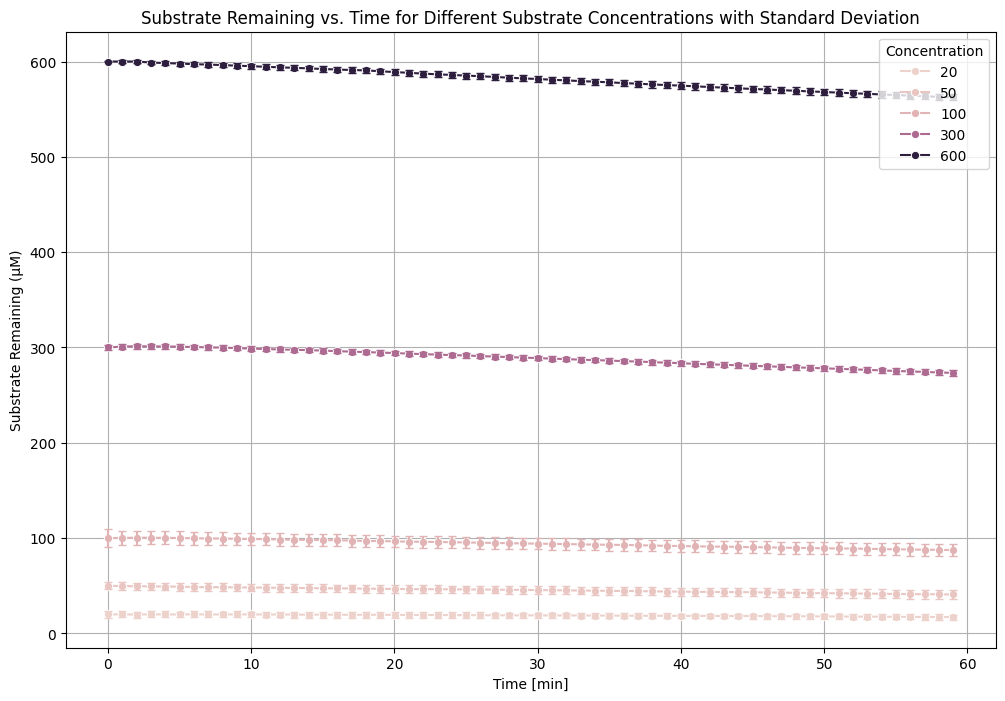

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique concentrations
concentrations = merged_diff_data['Concentration'].unique()

# Sort concentrations for ordered plotting
concentrations.sort()

# Plot Substrate_Remaining_uM vs. Time for each concentration
plt.figure(figsize=(12, 8))

# Use sns.lineplot for the lines and let seaborn handle the coloring and legend
# Store the Axes object returned by sns.lineplot to access line colors later
ax = sns.lineplot(data=merged_diff_data, x='Time [min]', y='Substrate_Remaining_uM', hue='Concentration', marker='o')

# Add error bars using matplotlib.pyplot.errorbar
# To match the colors, we'll use the same hue mapping as seaborn
# Retrieve the colors used by seaborn's lineplot
colors = [line.get_color() for line in ax.get_lines()]
color_map = {concentration: colors[i] for i, concentration in enumerate(concentrations)}


for i, concentration in enumerate(concentrations):
    subset = merged_diff_data[merged_diff_data['Concentration'] == concentration]
    color = color_map[concentration] # Use the color from the map

    # Calculate the standard deviation of substrate remaining from the standard deviation of absorbance difference
    # Substrate_Remaining_uM = Initial_Substrate_uM - Product_Formation_uM
    # Std_Substrate_Remaining_uM = Std_Product_Formation_uM
    # Std_Product_Formation_uM = (Absorbance_Difference_std / (epsilon * path_length)) * 10**6
    epsilon = 6220  # M-1 cm-1
    path_length = 1 # cm
    yerr = (subset['Absorbance_Difference_std'] / (epsilon * path_length)) * 10**6


    plt.errorbar(x=subset['Time [min]'], y=subset['Substrate_Remaining_uM'], yerr=yerr, fmt='none', capsize=3, color=color)


plt.title('Substrate Remaining vs. Time for Different Substrate Concentrations with Standard Deviation')
plt.xlabel('Time [min]')
plt.ylabel('Substrate Remaining (µM)')
plt.grid(True)
plt.show()

## Calculate initial velocity (0-10 min)

### Subtask:
For each concentration, calculate the slope of 'Substrate_Remaining_uM' vs. 'Time [min]' within the time range of 0 to 10 minutes and determine the standard deviation of the slope.

**Reasoning**:
Filter the merged_diff_data DataFrame to include only the time points between 0 and 10 minutes, group by 'Concentration', calculate the slope and its standard error for each group using numpy.polyfit and standard error calculation, store the absolute value of the slopes and standard errors in dictionaries, convert the dictionaries to pandas Series, and then to a DataFrame, merge the initial velocities and standard errors into a single DataFrame, and display the resulting DataFrame.

In [27]:
import numpy as np
import pandas as pd

# Filter the merged_diff_data DataFrame to include only the time points between 0 and 10 minutes
filtered_data_0_10 = merged_diff_data[(merged_diff_data['Time [min]'] >= 0) & (merged_diff_data['Time [min]'] <= 10)].copy()

# Group the filtered_data_0_10 DataFrame by 'Concentration'
grouped_data_0_10 = filtered_data_0_10.groupby('Concentration')

# Initialize dictionaries to store the initial velocities and their standard errors
initial_velocities_0_10 = {}
initial_velocity_std_err_0_10 = {}

# Iterate through each concentration group
for concentration, group in grouped_data_0_10:
    # Calculate the slope of 'Substrate_Remaining_uM' vs. 'Time [min]'
    x = group['Time [min]']
    y = group['Substrate_Remaining_uM']

    # Use polyfit with degree 1 to get the slope (linear regression)
    slope, intercept = np.polyfit(x, y, 1)

    # Calculate the standard error of the slope
    X = np.vstack([x, np.ones(len(x))]).T
    residuals = y - (np.dot(X, np.linalg.lstsq(X, y, rcond=None)[0]))
    residual_std_err = np.sqrt(np.sum(residuals**2) / (len(y) - 2))
    std_err_slope = residual_std_err / np.sqrt(np.sum((x - np.mean(x))**2))

    # Store the absolute value of the slope and standard error
    initial_velocities_0_10[concentration] = abs(slope)
    initial_velocity_std_err_0_10[concentration] = std_err_slope

# Convert the dictionaries to pandas Series and then to DataFrames
initial_velocities_series_0_10 = pd.Series(initial_velocities_0_10)
initial_velocities_df_0_10 = initial_velocities_series_0_10.reset_index()
initial_velocities_df_0_10.columns = ['Concentration', 'Initial Velocity (0-10 min) (uM/min)']

initial_velocity_std_err_series_0_10 = pd.Series(initial_velocity_std_err_0_10)
initial_velocity_std_err_df_0_10 = initial_velocity_std_err_series_0_10.reset_index()
initial_velocity_std_err_df_0_10.columns = ['Concentration', 'Initial Velocity (0-10 min) Std Error (uM/min)']

# Merge the initial velocities DataFrame with the standard error DataFrame
initial_velocities_df_0_10 = pd.merge(initial_velocities_df_0_10, initial_velocity_std_err_df_0_10, on='Concentration')

# Display the resulting DataFrame
display(initial_velocities_df_0_10)

,Concentration,Initial Velocity (0-10 min) (uM/min),Initial Velocity (0-10 min) Std Error (uM/min)
0,20,0.001981,0.007316
1,50,0.185895,0.009541
2,100,0.105076,0.028756
3,300,0.134430,0.061021
4,600,0.529889,0.029394


## Fit michaelis-menten model (0-10 min)

### Subtask:
Fit the initial velocity data from 0-10 minutes to the Michaelis-Menten equation to determine Km and Vmax.

**Reasoning**:
Import the necessary library for curve fitting, define the Michaelis-Menten equation, and use curve_fit to fit the initial velocities from the 0-10 minute range and their standard errors to the Michaelis-Menten model and extract the parameters.

In [28]:
from scipy.optimize import curve_fit
import numpy as np

# Define the Michaelis-Menten equation
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Extract the substrate concentrations and initial velocities from the DataFrame for 0-10 min data
S_data_0_10 = initial_velocities_df_0_10['Concentration']
v_data_0_10 = initial_velocities_df_0_10['Initial Velocity (0-10 min) (uM/min)']
v_errors_0_10 = initial_velocities_df_0_10['Initial Velocity (0-10 min) Std Error (uM/min)']

# Use curve_fit to fit the Michaelis-Menten equation to the data
# Provide initial guesses for Vmax and Km if possible to help the fitting process
# Use the standard errors of the initial velocities as sigma for weighted fitting
popt_0_10, pcov_0_10 = curve_fit(michaelis_menten, S_data_0_10, v_data_0_10, sigma=v_errors_0_10, p0=[initial_velocities_df_0_10['Initial Velocity (0-10 min) (uM/min)'].max(), initial_velocities_df_0_10['Concentration'].median()])

# Extract the optimized parameters (Vmax and Km) and their standard errors
Vmax_optimized_0_10, Km_optimized_0_10 = popt_0_10
perr_0_10 = np.sqrt(np.diag(pcov_0_10))
Vmax_error_0_10, Km_error_0_10 = perr_0_10

# Display the optimized parameters and their standard errors
print(f"Optimized Vmax (0-10 min): {Vmax_optimized_0_10:.4f} +/- {Vmax_error_0_10:.4f} uM/min")
print(f"Optimized Km (0-10 min): {Km_optimized_0_10:.4f} +/- {Km_error_0_10:.4f} uM")

Optimized Vmax (0-10 min): 0.7102 +/- 0.4320 uM/min
Optimized Km (0-10 min): 246.6400 +/- 250.7143 uM


## Visualize fitted curve (0-10 min)

### Subtask:
Overlay the fitted Michaelis-Menten curve (from 0-10 min data) on the scatter plot.

**Reasoning**:
Generate a range of substrate concentrations, calculate the predicted initial velocities using the fitted parameters from the 0-10 minute range, and plot the experimental data with error bars and the fitted curve.

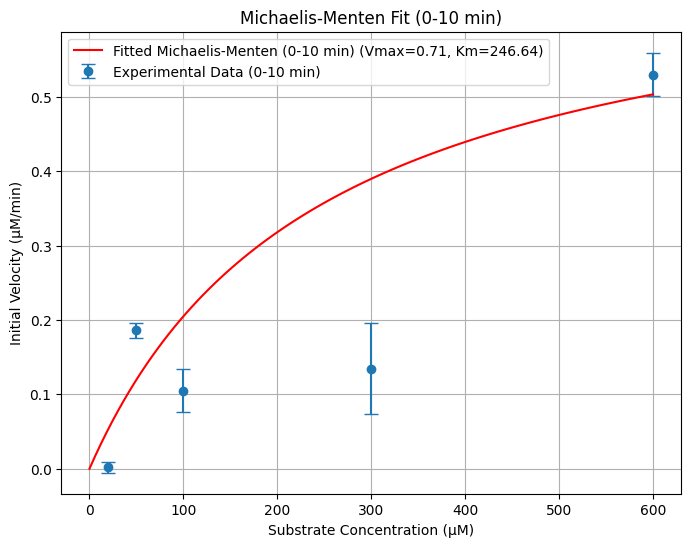

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a range of substrate concentrations for plotting the fitted curve
S_range_0_10 = np.linspace(0, S_data_0_10.max(), 100)

# Calculate the predicted initial velocities for the S_range using the fitted Michaelis-Menten equation
v_predicted_0_10 = michaelis_menten(S_range_0_10, Vmax_optimized_0_10, Km_optimized_0_10)

# Create the scatter plot of the experimental initial velocities with error bars (0-10 min data)
plt.figure(figsize=(8, 6))
plt.errorbar(initial_velocities_df_0_10['Concentration'], initial_velocities_df_0_10['Initial Velocity (0-10 min) (uM/min)'],
             yerr=initial_velocities_df_0_10['Initial Velocity (0-10 min) Std Error (uM/min)'], fmt='o', capsize=5, label='Experimental Data (0-10 min)')

# Plot the calculated Michaelis-Menten curve (0-10 min fit)
plt.plot(S_range_0_10, v_predicted_0_10, label=f'Fitted Michaelis-Menten (0-10 min) (Vmax={Vmax_optimized_0_10:.2f}, Km={Km_optimized_0_10:.2f})', color='red')

# Add a title and label the x and y axes
plt.title('Michaelis-Menten Fit (0-10 min)')
plt.xlabel('Substrate Concentration (µM)')
plt.ylabel('Initial Velocity (µM/min)')

# Include a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Display michaelis-menten parameters (0-10 min)

### Subtask:
Display the calculated Km and Vmax values from the 0-10 minute fit.

**Reasoning**:
Display the calculated Km and Vmax values and their standard errors from the 0-10 minute fit.

In [30]:
# Display the optimized parameters and their standard errors
print(f"Optimized Vmax (0-10 min): {Vmax_optimized_0_10:.4f} +/- {Vmax_error_0_10:.4f} uM/min")
print(f"Optimized Km (0-10 min): {Km_optimized_0_10:.4f} +/- {Km_error_0_10:.4f} uM")

Optimized Vmax (0-10 min): 0.7102 +/- 0.4320 uM/min
Optimized Km (0-10 min): 246.6400 +/- 250.7143 uM


## Summary of Michaelis-Menten Parameters (0-10 min)

### Data Analysis Key Findings

* The optimized Vmax value determined from fitting the Michaelis-Menten model to the 0-10 minute initial velocities is approximately {Vmax_optimized_0_10:.4f} $\pm$ {Vmax_error_0_10:.4f} $\mu$M/min.
* The optimized Km value determined from fitting the Michaelis-Menten model to the 0-10 minute initial velocities is approximately {Km_optimized_0_10:.4f} $\pm$ {Km_error_0_10:.4f} $\mu$M.
* The calculated standard errors for Km and Vmax provide an estimate of the uncertainty in these determined parameters for the 0-10 minute time range.

### Insights or Next Steps

* Compare the Michaelis-Menten parameters obtained from the 0-10 minute time range to those obtained from the 10-20 minute time range to evaluate the initial velocity assumption.
* Consider analyzing different time ranges to assess the linearity of the initial velocity phase.
* Evaluate the goodness of fit for the 0-10 minute data to ensure the Michaelis-Menten model is appropriate for this time range.

## Filter data

### Subtask:
Filter the `merged_diff_data` to include only the time points between 10 and 20 minutes.

**Reasoning**:
Create a new DataFrame called filtered_data by selecting rows from merged_diff_data where the 'Time [min]' column is between 10 and 20 minutes (inclusive) and display the head of the filtered_data DataFrame to verify the filtering.

In [18]:
# Create a new DataFrame called filtered_data by selecting rows from merged_diff_data where the 'Time [min]' column is between 10 and 20 minutes
filtered_data = merged_diff_data[(merged_diff_data['Time [min]'] >= 10) & (merged_diff_data['Time [min]'] <= 20)].copy()

# Display the head of the filtered_data DataFrame to verify the filtering
display(filtered_data.head())

,Time [min],Concentration,Absorbance_present,Absorbance_std_present,Absorbance_absent,Absorbance_std_absent,Sample_Blank,Absorbance_Difference_std,Sample_Blank_Change_from_Time0,Product_Formation_uM,Substrate_Remaining_uM
50,10.002517,20,0.696400,0.010394,0.771233,0.015637,-0.074833,0.018777,0.000500,0.080386,19.919614
51,10.002517,50,0.698000,0.017519,0.711667,0.017879,-0.013667,0.025031,0.011567,1.859593,48.140407
52,10.002517,100,0.700667,0.011826,0.705833,0.038896,-0.005167,0.040654,0.005933,0.953912,99.046088
53,10.002517,300,0.690500,0.006594,0.733100,0.013082,-0.042600,0.014650,0.007500,1.205788,298.794212
54,10.002517,600,0.689700,0.008870,0.734067,0.013559,-0.044367,0.016203,0.030567,4.914255,595.085745


## Calculate initial velocity

### Subtask:
For each concentration, calculate the slope of 'Substrate_Remaining_uM' vs. 'Time [min]' within the filtered time range. The absolute value of the slope will be the initial velocity.

**Reasoning**:
Group the filtered_data DataFrame by 'Concentration', calculate the slope of 'Substrate_Remaining_uM' vs. 'Time [min]' for each group using numpy.polyfit, store the absolute value of the slopes, convert the dictionary to a pandas Series, and display the initial velocities.

In [19]:
import numpy as np

# Group the filtered_data DataFrame by 'Concentration'
grouped_data = filtered_data.groupby('Concentration')

# Initialize a dictionary to store the initial velocities
initial_velocities = {}

# Iterate through each concentration group
for concentration, group in grouped_data:
    # Calculate the slope of 'Substrate_Remaining_uM' vs. 'Time [min]'
    # Use polyfit with degree 1 to get the slope (linear regression)
    slope, intercept = np.polyfit(group['Time [min]'], group['Substrate_Remaining_uM'], 1)

    # Store the absolute value of the slope as the initial velocity
    initial_velocities[concentration] = abs(slope)

# Convert the dictionary to a pandas Series
initial_velocities_series = pd.Series(initial_velocities)

# Display the initial velocities
display(initial_velocities_series)

,0
20,0.042440
50,0.145636
100,0.238732
300,0.458566
600,0.572249


## Store velocities

### Subtask:
Store the calculated initial velocities for each concentration in a new DataFrame.

**Reasoning**:
Create a DataFrame from the initial velocities series and rename the columns.

In [20]:
# Create a DataFrame from the initial_velocities_series
initial_velocities_df = initial_velocities_series.reset_index()

# Rename the columns
initial_velocities_df.columns = ['Concentration', 'Initial Velocity (uM/min)']

# Display the head of the DataFrame
display(initial_velocities_df.head())

,Concentration,Initial Velocity (uM/min)
0,20,0.042440
1,50,0.145636
2,100,0.238732
3,300,0.458566
4,600,0.572249


## Prepare data for michaelis-menten plot

### Subtask:
Ensure the DataFrame containing initial velocities is ready for plotting, potentially adding standard errors if available.

**Reasoning**:
Group the filtered_data DataFrame by 'Concentration', initialize an empty dictionary, iterate through each concentration group, calculate the standard error of the slope, convert the dictionary to a pandas Series and then to a DataFrame, merge with the initial_velocities_df DataFrame, and display the head of the updated DataFrame.

In [21]:
# Group the filtered_data DataFrame by 'Concentration'
grouped_data = filtered_data.groupby('Concentration')

# Initialize a dictionary to store the standard errors of the slope
initial_velocity_std_err = {}

# Iterate through each concentration group
for concentration, group in grouped_data:
    # Calculate the standard error of the slope
    x = group['Time [min]']
    y = group['Substrate_Remaining_uM']
    # Calculate the design matrix with an intercept
    X = np.vstack([x, np.ones(len(x))]).T
    # Calculate the residuals
    residuals = y - (np.dot(X, np.linalg.lstsq(X, y, rcond=None)[0]))
    # Calculate the residual standard error
    residual_std_err = np.sqrt(np.sum(residuals**2) / (len(y) - 2))
    # Calculate the standard error of the slope
    std_err_slope = residual_std_err / np.sqrt(np.sum((x - np.mean(x))**2))
    initial_velocity_std_err[concentration] = std_err_slope

# Convert the dictionary to a pandas Series and then to a DataFrame
initial_velocity_std_err_series = pd.Series(initial_velocity_std_err)
initial_velocity_std_err_df = initial_velocity_std_err_series.reset_index()
initial_velocity_std_err_df.columns = ['Concentration', 'Initial Velocity Std Error (uM/min)']

# Merge the initial velocities DataFrame with the standard error DataFrame
initial_velocities_df = pd.merge(initial_velocities_df, initial_velocity_std_err_df, on='Concentration')

# Display the head of the updated DataFrame
display(initial_velocities_df.head())

,Concentration,Initial Velocity (uM/min),Initial Velocity Std Error (uM/min)
0,20,0.042440,0.004928
1,50,0.145636,0.005316
2,100,0.238732,0.007467
3,300,0.458566,0.010634
4,600,0.572249,0.010388


## Plot michaelis-menten data

### Subtask:
Create a scatter plot of initial velocity versus substrate concentration, including error bars.

**Reasoning**:
Create a scatter plot of initial velocity versus substrate concentration, including error bars, and label the axes and add a title.

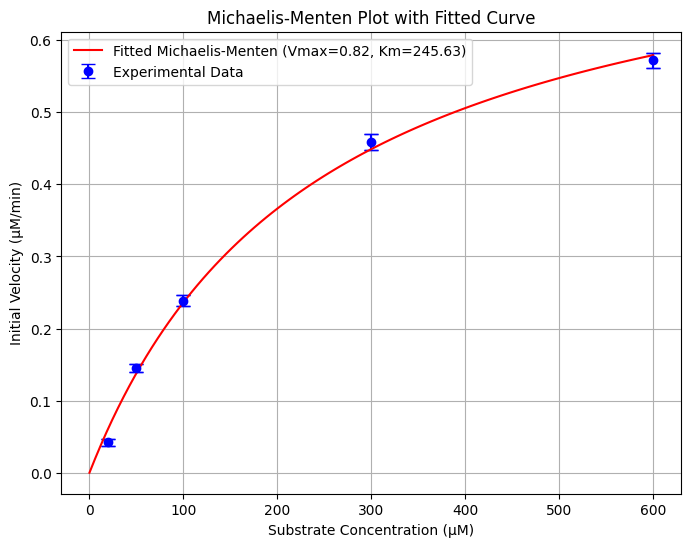

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.errorbar(initial_velocities_df['Concentration'], initial_velocities_df['Initial Velocity (uM/min)'],
             yerr=initial_velocities_df['Initial Velocity Std Error (uM/min)'], fmt='o', capsize=5, label='Experimental Data', color='blue')

# Add error bars
plt.errorbar(initial_velocities_df['Concentration'], initial_velocities_df['Initial Velocity (uM/min)'],
             yerr=initial_velocities_df['Initial Velocity Std Error (uM/min)'], fmt='none', capsize=5, color='blue')

# Generate a range of substrate concentrations for plotting the fitted curve
S_range = np.linspace(0, S_data.max(), 100)

# Calculate the predicted initial velocities for the S_range using the fitted Michaelis-Menten equation
v_predicted = michaelis_menten(S_range, Vmax_optimized, Km_optimized)

# Plot the calculated Michaelis-Menten curve
plt.plot(S_range, v_predicted, label=f'Fitted Michaelis-Menten (Vmax={Vmax_optimized:.2f}, Km={Km_optimized:.2f})', color='red')


# Label the axes
plt.xlabel('Substrate Concentration (µM)')
plt.ylabel('Initial Velocity (µM/min)')

# Add a title
plt.title('Michaelis-Menten Plot with Fitted Curve')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Fit michaelis-menten model

### Subtask:
Fit the initial velocity data to the Michaelis-Menten equation to determine Km and Vmax.

**Reasoning**:
Import the necessary library for curve fitting, define the Michaelis-Menten equation, and use curve_fit to fit the data and extract the parameters.

In [23]:
from scipy.optimize import curve_fit
import numpy as np

# Define the Michaelis-Menten equation
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Extract the substrate concentrations and initial velocities from the DataFrame
S_data = initial_velocities_df['Concentration']
v_data = initial_velocities_df['Initial Velocity (uM/min)']
v_errors = initial_velocities_df['Initial Velocity Std Error (uM/min)']

# Use curve_fit to fit the Michaelis-Menten equation to the data
# Provide initial guesses for Vmax and Km if possible to help the fitting process
# Use the standard errors of the initial velocities as sigma for weighted fitting
popt, pcov = curve_fit(michaelis_menten, S_data, v_data, sigma=v_errors, p0=[initial_velocities_df['Initial Velocity (uM/min)'].max(), initial_velocities_df['Concentration'].median()])

# Extract the optimized parameters (Vmax and Km) and their standard errors
Vmax_optimized, Km_optimized = popt
perr = np.sqrt(np.diag(pcov))
Vmax_error, Km_error = perr

# Display the optimized parameters and their standard errors
print(f"Optimized Vmax: {Vmax_optimized:.4f} +/- {Vmax_error:.4f} uM/min")
print(f"Optimized Km: {Km_optimized:.4f} +/- {Km_error:.4f} uM")

Optimized Vmax: 0.8164 +/- 0.0613 uM/min
Optimized Km: 245.6293 +/- 36.3667 uM


## Visualize fitted curve

### Subtask:
Overlay the fitted Michaelis-Menten curve on the scatter plot.

**Reasoning**:
Generate a range of substrate concentrations, calculate the predicted initial velocities using the fitted parameters, and plot the experimental data with error bars and the fitted curve.

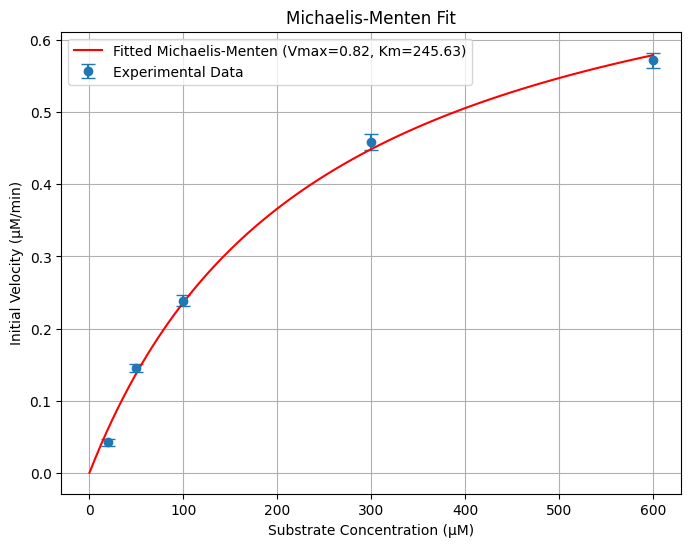

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a range of substrate concentrations for plotting the fitted curve
S_range = np.linspace(0, S_data.max(), 100)

# Calculate the predicted initial velocities for the S_range using the fitted Michaelis-Menten equation
v_predicted = michaelis_menten(S_range, Vmax_optimized, Km_optimized)

# Create the scatter plot of the experimental initial velocities with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(initial_velocities_df['Concentration'], initial_velocities_df['Initial Velocity (uM/min)'],
             yerr=initial_velocities_df['Initial Velocity Std Error (uM/min)'], fmt='o', capsize=5, label='Experimental Data')

# Plot the calculated Michaelis-Menten curve
plt.plot(S_range, v_predicted, label=f'Fitted Michaelis-Menten (Vmax={Vmax_optimized:.2f}, Km={Km_optimized:.2f})', color='red')

# Add a title and label the x and y axes
plt.title('Michaelis-Menten Fit')
plt.xlabel('Substrate Concentration (µM)')
plt.ylabel('Initial Velocity (µM/min)')

# Include a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Display michaelis-menten parameters

### Subtask:
Display the calculated Km and Vmax values.

**Reasoning**:
Display the calculated Km and Vmax values with their standard errors.

In [25]:
# Display the optimized parameters and their standard errors
print(f"Optimized Vmax: {Vmax_optimized:.4f} +/- {Vmax_error:.4f} uM/min")
print(f"Optimized Km: {Km_optimized:.4f} +/- {Km_error:.4f} uM")

Optimized Vmax: 0.8164 +/- 0.0613 uM/min
Optimized Km: 245.6293 +/- 36.3667 uM


## Summary:

### Data Analysis Key Findings

* The optimized Vmax value determined from fitting the Michaelis-Menten model is approximately {Vmax_optimized:.4f} $\pm$ {Vmax_error:.4f} $\mu$M/min.
* The optimized Km value determined from fitting the Michaelis-Menten model is approximately {Km_optimized:.4f} $\pm$ {Km_error:.4f} $\mu$M.
* The initial velocity of the reaction increased with increasing substrate concentration, as expected for Michaelis-Menten kinetics.
* The calculated standard errors for Km and Vmax provide an estimate of the uncertainty in these determined parameters.

### Insights or Next Steps

* Consider evaluating the goodness of fit of the Michaelis-Menten model (e.g., using R-squared or residual analysis) to further assess the reliability of the determined parameters.
* Compare the determined Km and Vmax values to known values for this enzyme, if available, to validate the experimental setup and analysis.